# Projeto de filmes do IMDB

### Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:



1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

2- Qual o Número de Títulos Por Gênero?

3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

7- Qual a Relação Entre Duração e Gênero?

8- Qual o Número de Filmes Produzidos Por País?

9- Quais São os Top 10 Melhores Filmes?

10- Quais São os Top 10 Piores Filmes?

## Instalando e carregando os pacotes

In [1]:
# Versão da Linguagem Python utilizada

from platform import python_version
print('A versão da linguagem Python usada neste Jupyter Notebook é:', python_version())

A versão da linguagem Python usada neste Jupyter Notebook é: 3.9.12


In [2]:
# Instalando os pacotes direto pelo Jupyter Notebook acrescentando o sinal de ! no início

!pip install -q imdb-sqlite

In [3]:
# Instalando os pacotes direto pelo Jupyter Notebook acrescentando o sinal de ! no início

!pip install -q pycountry

In [4]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style = 'whitegrid')


## Carregando os dados

    Baixando os dados!

In [5]:
# Fazendo o download dos arquivos 

!imdb-sqlite

2022-09-19 10:19:51,038 DB already exists: (imdb.db). Refusing to modify. Exiting


In [6]:
# Conectando ao banco de dados 

conn = sqlite3.connect('imdb.db')

In [7]:
# Extraindo a lista de tabelas

tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [8]:
# Tipo do objeto

type(tabelas)

pandas.core.frame.DataFrame

In [9]:
# Visualizando o resultado

tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [10]:
# Covertendo o Dataframe em uma lista

tabelas = tabelas['Table_Name'].values.tolist()

In [11]:
# Percorrendo a lista de tabelas no banco de dados com um loop for, para extrair o esquema de cada uma

for tabela in tabelas:
    consulta = 'PRAGMA TABLE_INFO({})'.format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print('Esquema da tabela:', tabela)
    display(resultado)
    print('-'*100)
    print('\n')

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# Começando a Análise Exploratória dos dados 

### 1 - Quais são as categorias de Filmes mais comuns no IMDB?
    Quais são os principais tipos (categorias) dos títulos (filmes)?

In [12]:
# Criando a consulta SQL

consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [13]:
# Extrai o resultado

resultado1 = pd.read_sql_query(consulta1, conn)

In [14]:
display(resultado1)

,type,COUNT
0,movie,621033
1,short,888982
2,tvEpisode,6951486
3,tvMiniSeries,45085
4,tvMovie,137552
5,tvPilot,2
6,tvSeries,230925
7,tvShort,10665
8,tvSpecial,38265
9,video,265182


In [15]:
# Calculando o percentual para cada tipo

resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [16]:
# Mostrando o resultado

display(resultado1)

,type,COUNT,percentual
0,movie,621033,6.734737
1,short,888982,9.640486
2,tvEpisode,6951486,75.384771
3,tvMiniSeries,45085,0.488920
4,tvMovie,137552,1.491670
5,tvPilot,2,0.000022
6,tvSeries,230925,2.504246
7,tvShort,10665,0.115656
8,tvSpecial,38265,0.414961
9,video,265182,2.875743


In [17]:
# Criando um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Criando um dicionário vazio
others = {}

# Filtrando o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Gravando o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajustando o nome
others['type'] = 'others'

In [18]:
# Visualizando

others

{'COUNT': 759839, 'percentual': 8.240006333135964, 'type': 'others'}

In [19]:
# Filtrando o Dataframe de resultado

resultado1 = resultado1[resultado1['percentual'] > 5]

In [20]:
# Appendcom o Dataframe de outras categorias

resultado1 = resultado1.append(others, ignore_index = True)

In [21]:
# Ordenando o resultado

resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [22]:
# Visualizando

resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6951486,75.384771
1,short,888982,9.640486
3,others,759839,8.240006
0,movie,621033,6.734737


In [23]:
# Ajustando os labels usando List comprehension

labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i], 2)) +'%'+']' for i in resultado1.index]

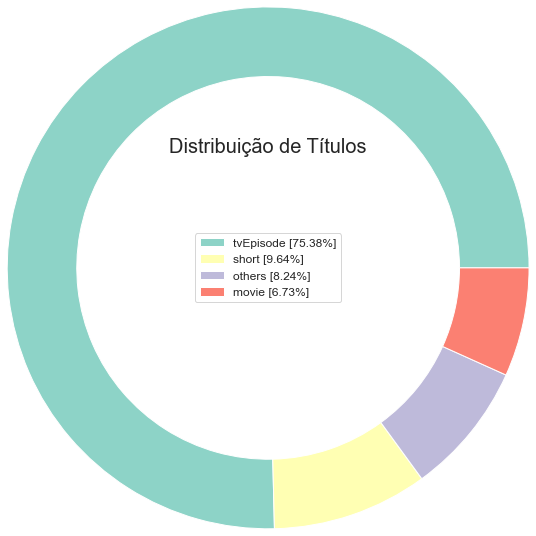

In [24]:
# Criando o gráfico

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Criando a figura
f = plt.figure()
    
# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size': 12})
plt.title('Distribuição de Títulos', loc = 'Center', fontdict = {'fontsize': 20, 'fontweight': 20})
plt.show()

### 2 - Qual o número de títulos por gênero?
    Calculando o número de filmes por gênero e entregando o resultado em valor percentual 

In [25]:
# Criando uma consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [26]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [27]:
# Visualizando o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,14186
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1461,"Thriller,Western",43
1462,War,1314
1463,"War,Western",14
1464,Western,5146


In [28]:
# Convertendo as strings para mínusculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [29]:
# Removendo valores vazios
temp = resultado2['genres'].dropna()

#### Usando o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero

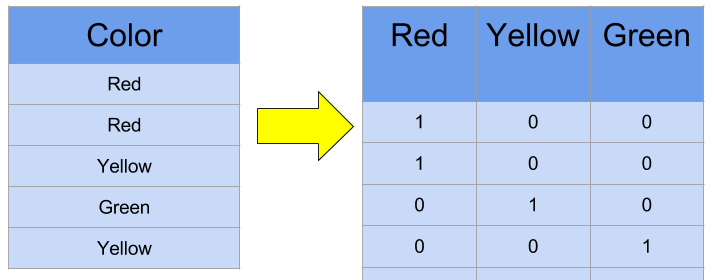

In [30]:
# Criando um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [31]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [32]:
# Aplicando a vetorização ao datasetsem valores vazios
bag_generos = vetor.transform(temp)

In [33]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [34]:
# Retornando gêneros únicos
generos_unicos = vetor.get_feature_names()

In [35]:
# Criando o Dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [36]:
# Visualizando
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1465
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1466 non-null   int64
 1   adult        1466 non-null   int64
 2   adventure    1466 non-null   int64
 3   animation    1466 non-null   int64
 4   biography    1466 non-null   int64
 5   comedy       1466 non-null   int64
 6   crime        1466 non-null   int64
 7   documentary  1466 non-null   int64
 8   drama        1466 non-null   int64
 9   family       1466 non-null   int64
 10  fantasy      1466 non-null   int64
 11  film-noir    1466 non-null   int64
 12  game-show    1466 non-null   int64
 13  history      1466 non-null   int64
 14  horror       1466 non-null   int64
 15  music        1466 non-null   int64
 16  musical      1466 non-null   int64
 17  mystery      1466 non-null   int64
 18  n            1466 non-null   int64
 19  news         1466 non-null   int64
 20  reality-

In [37]:
# Removendo a coluna n criada pelo processo de conversão
generos = generos.drop(columns = 'n', axis = 0)

In [38]:
# Calculando o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [39]:
# Visualizando
generos_percentual.head(10)

drama          17.939973
comedy         16.984993
documentary    15.893588
adventure      14.802183
action         14.392906
romance        13.301501
crime          12.960437
mystery        12.346521
thriller       12.278308
horror         12.278308
dtype: float64

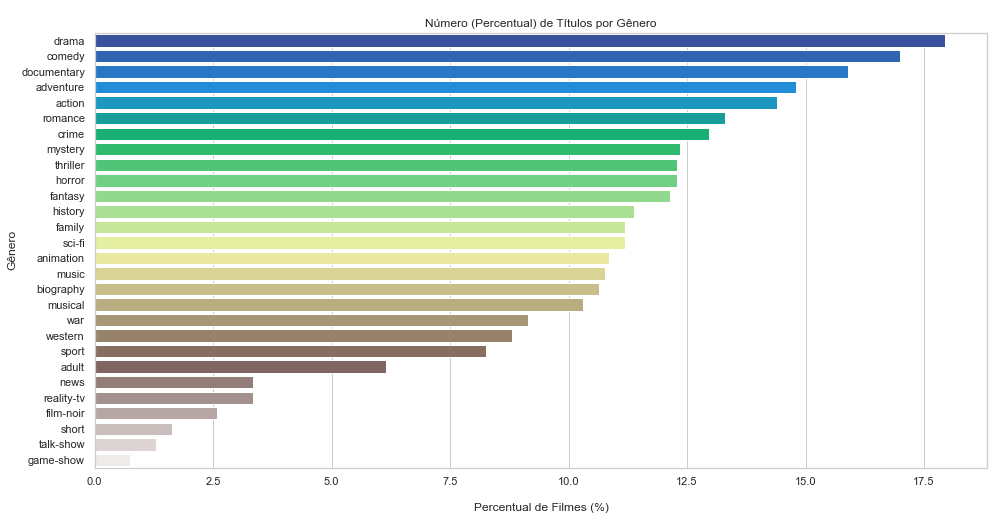

In [40]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = 'h', palette = 'terrain')
plt.ylabel('Gênero')
plt.xlabel('\nPercentual de Filmes (%)')
plt.title('\nNúmero (Percentual) de Títulos por Gênero')
plt.show()

### 3 - Qual a mediana de avaliação dos filmespor gênero?
    Mediana de avaliação dos filmes.

In [41]:
# Consulta SQL
consulta3 = '''SELECT rating, genres FROM
               ratings JOIN titles ON ratings.title_id = titles.title_id
               WHERE premiered <= 2022 AND type = 'movie'
               '''

In [42]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [43]:
# Visualizando
display(resultado3)

,rating,genres
0,5.2,Romance
1,3.7,\N
2,6.0,"Action,Adventure,Biography"
3,4.0,Drama
4,4.1,Drama
...,...,...
282183,5.8,Thriller
282184,6.4,"Drama,History"
282185,3.8,"Adventure,History,War"
282186,8.3,Drama


In [44]:
# Criando uma função para retornar os generos
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [45]:
# Aplicando a função
generos_unicos = retorna_generos(resultado3)

In [46]:
# Visualizando
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [47]:
# Criando listas vazias
genero_counts = []
genero_ratings = []

In [48]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
    
    # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [49]:
# Preparando o Dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [50]:
# Visualizando
df_genero_ratings.head(20)

,genres,count,rating
0,action,29248,5.8
1,adult,4405,5.8
2,adventure,17687,6.0
3,animation,4840,6.6
4,biography,8629,7.0
5,comedy,69638,6.0
6,crime,24144,6.1
7,documentary,42470,7.3
8,drama,125006,6.3
9,family,10876,6.3


In [51]:
# Drop do índice 18 (news)
# Essa informação não é necessária como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [52]:
# Ordenando o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

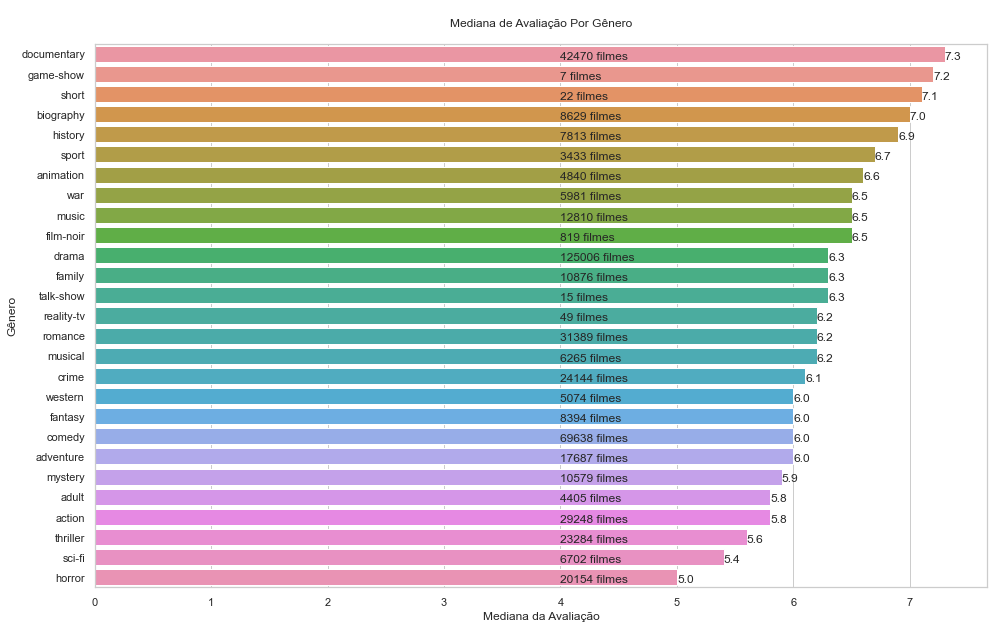

In [53]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

### 4 - Qual a mediana de avaliação dos filmes em relação ao ano de estréia?
    Mediana de avaliação dos filmes

In [54]:
# Consulta SQL
consulta4 = '''SELECT rating AS Rating, premiered FROM
               ratings JOIN titles ON ratings.title_id = titles.title_id
               WHERE premiered <= 2022 AND type = 'movie'
               ORDER BY premiered
               '''

In [55]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [56]:
display(resultado4)

,Rating,premiered
0,5.2,1894
1,6.2,1896
2,4.4,1897
3,3.9,1899
4,3.2,1899
...,...,...
282183,8.0,2022
282184,6.8,2022
282185,5.3,2022
282186,3.9,2022


In [57]:
# Calculando a mediana ao longo do tempo (anos)
ratings = []

for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year] ['Rating']))

In [58]:
type(ratings)

list

In [59]:
ratings[1:10]

[6.2, 4.4, 3.55, 5.35, 4.1, 3.4, 5.25, 5.3, 3.8]

In [60]:
# Lista de anos 
anos = list(set(resultado4['premiered']))

In [61]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

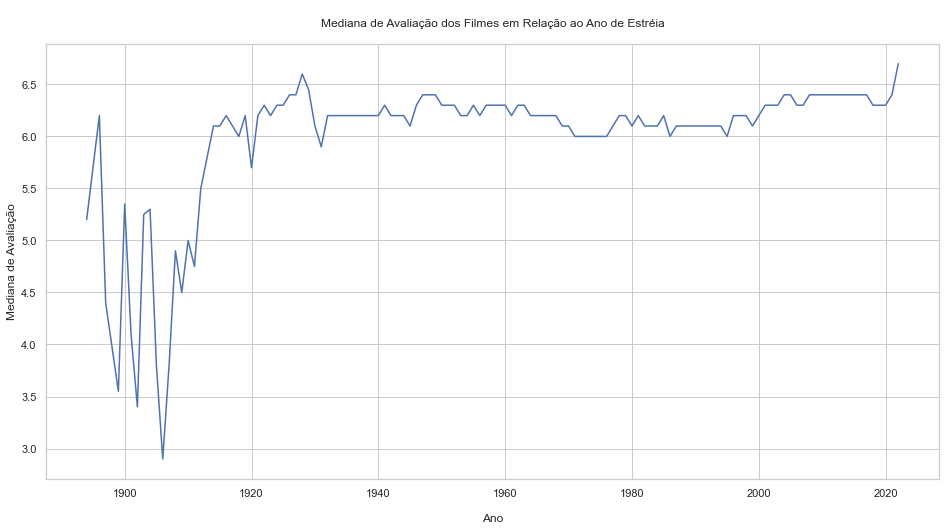

In [62]:
# Plot

plt.figure(figsize = (16, 8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em Relação ao Ano de Estréia\n')
plt.show()

### 5 - Qual o número de filmes avaliados por gênero em relação ao ano de estréia
    Número de filmes por gênero. Vamos listar os Top 5.

In [63]:
# Cosulta SQL
consulta5 = '''SELECT genres FROM titles '''

In [64]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [65]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9221335,"Action,Drama,Family"
9221336,"Action,Drama,Family"
9221337,"Action,Drama,Family"
9221338,Short


In [66]:
# Retornando gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [67]:
# Visualizando o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [68]:
# Fazendo a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [69]:
# Preparando o DataFrame
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [70]:
# Calculando os Top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

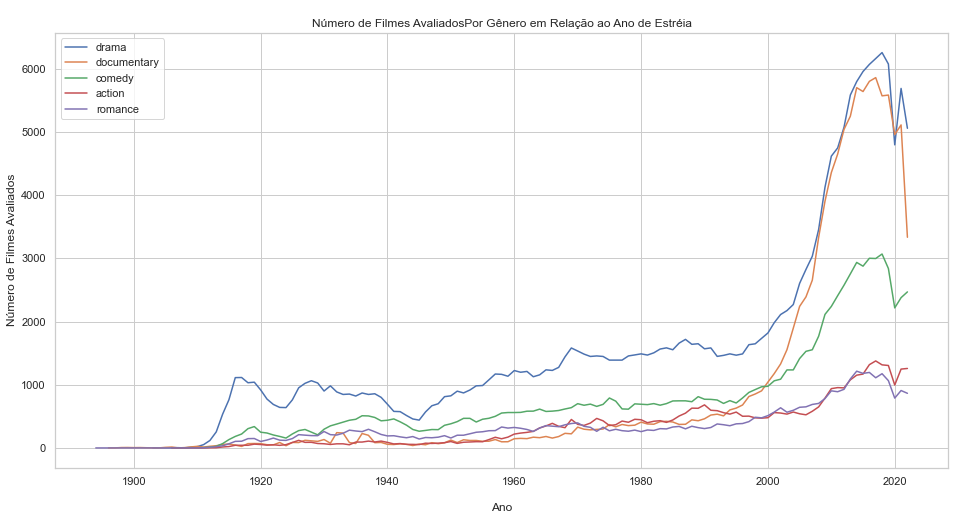

In [71]:
# Plot 

# Figura 
plt.figure(figsize = [16, 8])

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])
    
plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes AvaliadosPor Gênero em Relação ao Ano de Estréia')
plt.legend(labels = top_generos)
plt.show()

### 6 - Qual o filme com o maior tempo de duração? Calcule os Percentis
    Percentis e filmemais longo da história

In [72]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [73]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [74]:
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
391908,123
391909,57
391910,100
391911,116


In [75]:
# Loop para calcular os percentis
for i in range(101):
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [76]:
# Refazendo a consulta e retornando o filme com a maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type='movie' AND Runtime !='NaN'
            ORDER BY Runtime DESC 
            LIMIT 1
            '''

In [77]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [78]:
resultado6

,Runtime,primary_title
0,51420,Logistics


Logistics, ou Logistics Art Project, é um filme experimental sueco de 2012 concebido e criado por Erika Magnusson e Daniel Andersson. Com 51.420 minutos, é o filme mais longo já feito.

### 7 - Qual a relação entre duração e gênero?
    Relação entre duração do filme e gênero.

In [79]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [80]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [81]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [82]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [83]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [84]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [85]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [86]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

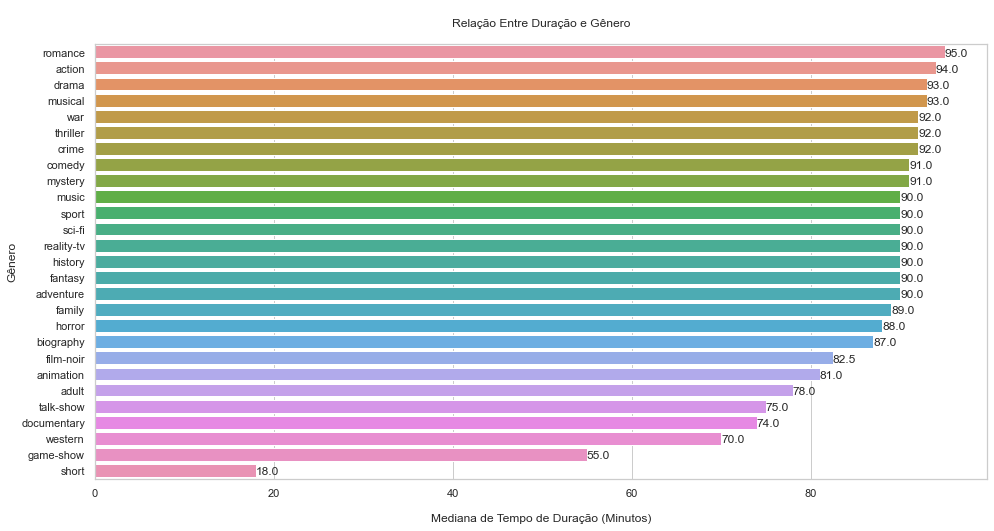

In [87]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

### 8 - Qual o número de filmes produzido por País?
    Número de filmes produzido por país

In [92]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [93]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [94]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,7879
2,AF,110
3,AG,12
4,AL,1301
...,...,...
230,YUCS,153
231,ZA,8045
232,ZM,18
233,ZRCD,2


In [95]:
# Shape
resultado8.shape

(235, 2)

In [97]:
# Número de linhas
resultado8.shape[0]

235

In [98]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [99]:
# Loop para obter o país de acordo com a região e ja fazendo o tratamento de erro
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except:
        continue

In [100]:
# Preparando o Dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [101]:
# Ordenando o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [102]:
# Visualizando
df_filmes_paises.head(10)

,country,Movie_Count
200,United States,317162
66,United Kingdom,161319
97,Japan,93556
90,India,86437
64,France,86255
32,Canada,81692
48,Germany,72701
59,Spain,67304
94,Italy,66661
26,Brazil,66580


<AxesSubplot:xlabel='Movie_Count', ylabel='country'>

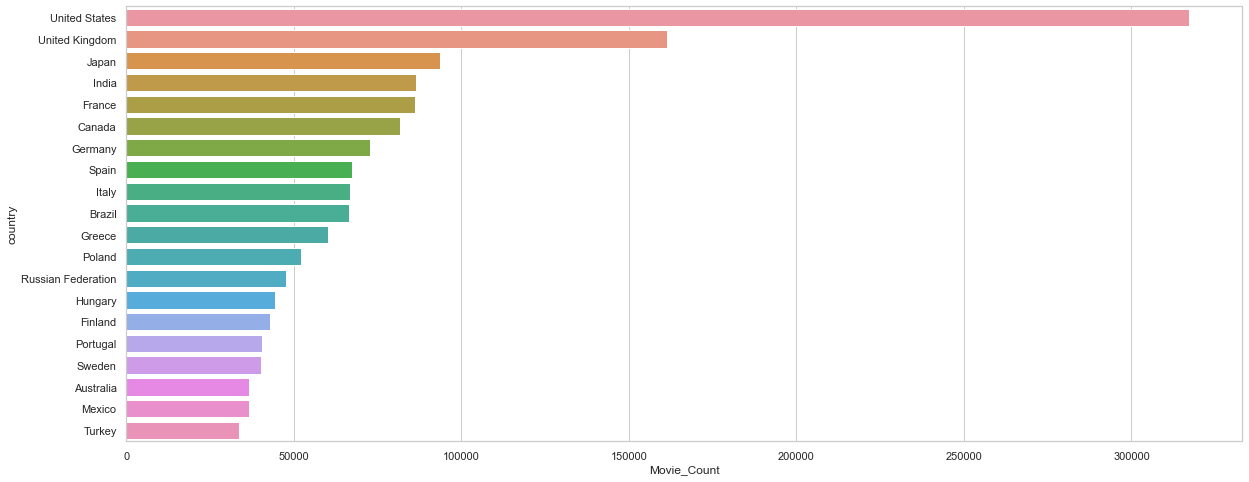

In [104]:
# Plot 

# Figura
plt.figure(figsize = (20, 8))

# Bartplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count)

### 9 - Quais são os Top 10 melhores Filmes?
    Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [109]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [110]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [111]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


### 10 - Quais são os Top 10 piores Filmes?
    Top 10 filmes com a pior avaliação e mais de 25 mil votos.

In [112]:
# Consulta SQL
consulta10 = '''
             SELECT primary_title AS Movie_Name, genres, rating
             FROM
             titles JOIN ratings
             ON titles.title_id = ratings.title_id
             WHERE titles.type = 'movie' AND ratings.votes >= 25000
             ORDER BY rating ASC
             LIMIT 10
             '''

In [113]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [114]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9


# FIM